## Used Car Price Predictions 

Solved Notebook Link - https://www.kaggle.com/code/iabhishekmaurya/used-car-price-prediction

Solved Users LinkedIn - https://www.linkedin.com/in/abhishek-5b642580/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')

In [3]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine (CC),Power (bhp),Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
train.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine (CC),Power (bhp),Seats,New_Price,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine (CC)        5983 non-null   object 
 9   Power (bhp)        5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


## Couting all the 'null', 'nan' samples in the Training Set

In [7]:
train.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine (CC)            36
Power (bhp)            36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

## Couting all the 'null', 'nan' samples in the Testing Set

In [8]:
test.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

#### This .describe() method is only able to print the numeric values, we need to perform Data Pre-Processing to tranform all the other values to numeric format and use the .describe() method

In [9]:
train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [10]:
# Looking at the unique values of Categorical Features

print("Location : ", train['Location'].unique())

print("\nFuel Type : ", train['Fuel_Type'].unique())

print("\nTransmission : ", train['Transmission'].unique())

print("\nOwner Type : ", train['Owner_Type'].unique())

Location :  ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']

Fuel Type :  ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']

Transmission :  ['Manual' 'Automatic']

Owner Type :  ['First' 'Second' 'Fourth & Above' 'Third']


### Checking the positions of the 'null' samples in the 'Power' Feature

In [11]:
train[train['Power (bhp)'] == 'null bhp']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine (CC),Power (bhp),Seats,New_Price,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,NaN,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,NaN,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,NaN,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,NaN,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,NaN,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,NaN,1.20
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,NaN,1.75
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5 kmpl,1798 CC,null bhp,5.0,NaN,2.85
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6.0,NaN,1.70


In [12]:
train['Power (bhp)'][76]

'null bhp'

In [13]:
train[train.Location == 'Pune']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine (CC),Power (bhp),Seats,New_Price,Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50
38,Mercedes-Benz M-Class ML 350 CDI,Pune,2013,85000,Diesel,Automatic,First,11.74 kmpl,2987 CC,254.8 bhp,5.0,NaN,28.00
63,Mercedes-Benz New C-Class 200 CDI Classic,Pune,2011,65000,Diesel,Manual,Second,15.8 kmpl,2148 CC,170 bhp,5.0,NaN,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5990,Tata New Safari DICOR 2.2 VX 4x2,Pune,2008,86000,Diesel,Manual,Third,13.93 kmpl,2179 CC,138 bhp,7.0,NaN,0.60
5994,Honda City 1.5 E MT,Pune,2009,60000,Petrol,Manual,Third,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,3.25
5995,Renault Duster 85PS Diesel RxL Explore,Pune,2015,30000,Diesel,Manual,First,19.87 kmpl,1461 CC,83.8 bhp,5.0,NaN,7.75
5998,Volkswagen Polo IPL II 1.2 Petrol Highline,Pune,2010,70290,Petrol,Manual,Second,17.24 kmpl,1198 CC,73.9 bhp,5.0,NaN,2.96


In [14]:
print("Shape of train data Before dropping any Row: ", train.shape)

train = train[train['Mileage'].notna()]
print("\nShape of train data After dropping Rows with NULL values in Mileage: ", train.shape)

train = train[train['Engine (CC)'].notna()]
print("\nShape of train data After dropping Rows with NULL values in Engine : ", train.shape)

train = train[train['Power (bhp)'].notna()]
print("\nShape of train data After dropping Rows with NULL values in Power  : ", train.shape)

train = train[train['Seats'].notna()]
print("\nShape of train data After dropping Rows with NULL values in Seats  : ", train.shape)

Shape of train data Before dropping any Row:  (6019, 13)

Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 13)

Shape of train data After dropping Rows with NULL values in Engine :  (5981, 13)

Shape of train data After dropping Rows with NULL values in Power  :  (5981, 13)

Shape of train data After dropping Rows with NULL values in Seats  :  (5975, 13)


In [15]:
train = train.reset_index(drop=True)

### After dropping many samples we need to reset the index so that, the old indices won't be still considered on the processed dataframe

In [16]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine (CC),Power (bhp),Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [17]:
train.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine (CC),Power (bhp),Seats,New_Price,Price
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
5974,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


## All these Features have something in Common:

#### They all have numeric values as well as string values, so we conider only the Numeric Values by splitting the contents of each sample and using only the numeric values

In [18]:
for i in range(train.shape[0]):
    train.at[i, 'Company'] = train['Name'][i].split()[0]
    train.at[i, 'Mileage(km/kg)'] = train['Mileage'][i].split()[0]
    train.at[i, 'Engine (CC)'] = train['Engine (CC)'][i].split()[0]
    train.at[i, 'Power (bhp)'] = train['Power (bhp)'][i].split()[0]

In [19]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine (CC),Power (bhp),Seats,New_Price,Price,Company,Mileage(km/kg)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998,58.16,5.0,NaN,1.75,Maruti,26.6
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582,126.2,5.0,NaN,12.50,Hyundai,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199,88.7,5.0,8.61 Lakh,4.50,Honda,18.2
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76,7.0,NaN,6.00,Maruti,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.8,5.0,NaN,17.74,Audi,15.2


In [20]:
train['Mileage'][0].split()[0]

'26.6'

### Converting these Featues to Float format for coputational purposes

In [21]:
train['Mileage(km/kg)'] = train['Mileage(km/kg)'].astype(float)
train['Engine (CC)'] = train['Engine (CC)'].astype(float)

In [22]:
type(train['Engine (CC)'])

pandas.core.series.Series

#### When we try to perform the above operation on the 'Power (bhp)' feature it thorws an error 

In [23]:
train['Power (bhp)'] = train['Power (bhp)'].astype(float)

ValueError: could not convert string to float: 'null'

#### Here it says can't convert string to float where the string is 'null'

#### Below here are the Samples where the 'Power (bhp)' Feature is 'null'

In [24]:
train[train['Power (bhp)'] == 'null']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine (CC),Power (bhp),Seats,New_Price,Price,Company,Mileage(km/kg)
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399.0,null,5.0,NaN,2.00,Ford,17.80
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086.0,null,5.0,NaN,1.30,Hyundai,0.00
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086.0,null,5.0,NaN,2.10,Hyundai,17.00
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086.0,null,5.0,NaN,0.85,Hyundai,17.00
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086.0,null,5.0,NaN,1.67,Hyundai,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,Hyundai Santro Xing XO,Chennai,2007,79000,Petrol,Manual,First,17.0 kmpl,1086.0,null,5.0,NaN,1.85,Hyundai,17.00
5830,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0 kmpl,1086.0,null,5.0,NaN,1.20,Hyundai,17.00
5881,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5 kmpl,1798.0,null,5.0,NaN,2.85,Skoda,17.50
5899,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112.0,null,6.0,NaN,1.70,Mahindra,0.00


In [25]:
train['Power (bhp)'].isnull().sum()

0

### Finding the Count of such 'null' samples and appending the positions in an array for dropping such samples further

In [26]:
count = 0
position = []
for i in range(train.shape[0]):
    if train['Power (bhp)'][i] == 'null':
        count = count + 1
        position.append(i)

print(count)
print("")
print(position)

103

[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [27]:
train.shape

(5975, 15)

### Here we drop the 'null' samples

In [28]:
train = train.drop(train.index[position])
train = train.reset_index(drop=True)

In [29]:
train.shape

(5872, 15)

#### So, we got rid of the 103 'null' samples

#### Now, we can convert the 'Power (bhp)' to float series

In [30]:
train['Power (bhp)'] = train['Power (bhp)'].astype(float)

### Now we'll look at the New-Price Feature for the 'nan' values and get rid of them

In [31]:
train['New_Price'][1]

nan

In [32]:
train['New_Price'].isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        True
1        True
2       False
3        True
4        True
        ...  
5867    False
5868     True
5869     True
5870     True
5871     True
Name: New_Price, Length: 5872, dtype: bool>

In [33]:
train[train.New_Price == 'nan']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine (CC),Power (bhp),Seats,New_Price,Price,Company,Mileage(km/kg)


In [34]:
for i in range(train.shape[0]):
    if pd.isnull(train.loc[i,'New_Price']) == False:
        train.at[i,'New_Price'] = train['New_Price'][i].split()[0]

In [35]:
train['New_Price']

0        NaN
1        NaN
2       8.61
3        NaN
4        NaN
        ... 
5867    7.88
5868     NaN
5869     NaN
5870     NaN
5871     NaN
Name: New_Price, Length: 5872, dtype: object

### Again convertign the Core Series into Core Float Series

In [36]:
train['New_Price'] = train['New_Price'].astype(float)

### Now our Dataset has equal no. of samples in all the Features and there are no null or NaN values as well!

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   object 
 8   Engine (CC)        5872 non-null   float64
 9   Power (bhp)        5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  New_Price          823 non-null    float64
 12  Price              5872 non-null   float64
 13  Company            5872 non-null   object 
 14  Mileage(km/kg)     5872 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 688.2+ KB


***

## Visualizations

### Let's understand the 'Price Column'

When we see the MIN, MAX and MEAN we understand that the range is pretty screwed as:
1) MIN is just 0.440 <br>
2) MEAN = 9.603 <br>
3) MAXX = 160.000 <br>

<b> This shows that the MEAN is just 9.603 but the MAX (160.00) is so high. <br>
This shows that there are very few values with Price > 150 hence could be possible outliers. </b>

In [38]:
train['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

### Plotting a Distance Plot

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 160.0)

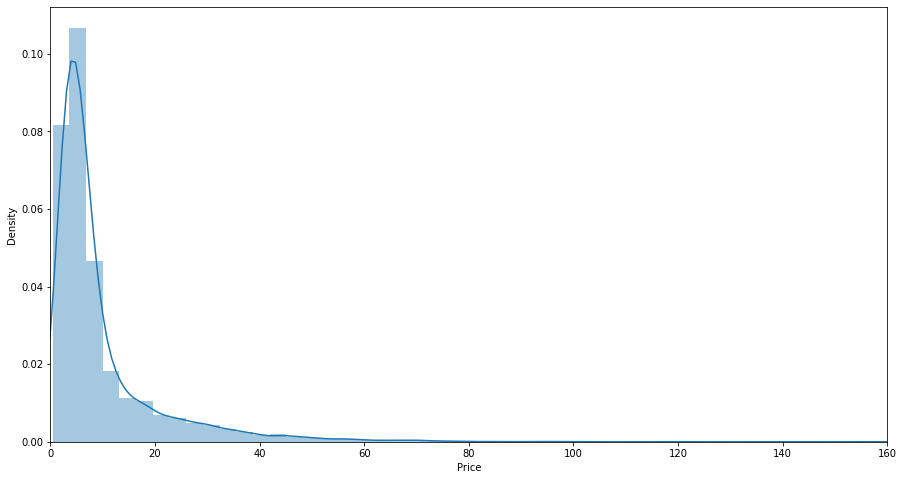

In [39]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(train['Price'])
plt.xlim([0,160])

### This graph itself shows us how badly right-skewed this Graph is. <br>
#### And how such low no. of samples are present in the price range 60 - 160 <br>

#### And how heavily sampled the price range 0 - 55 is!

***

In [40]:
train['Fuel_Type'].describe()

count       5872
unique         4
top       Diesel
freq        3152
Name: Fuel_Type, dtype: object

## Price vs. Owner Type

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

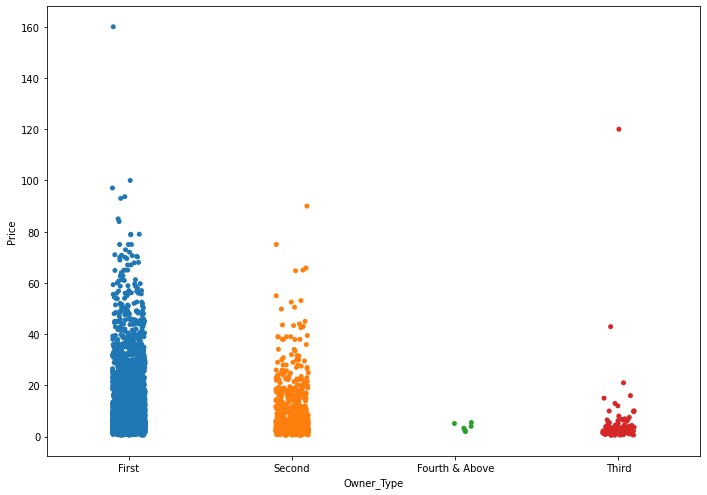

In [41]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = train) 

## Company

<Figure size 1440x720 with 0 Axes>

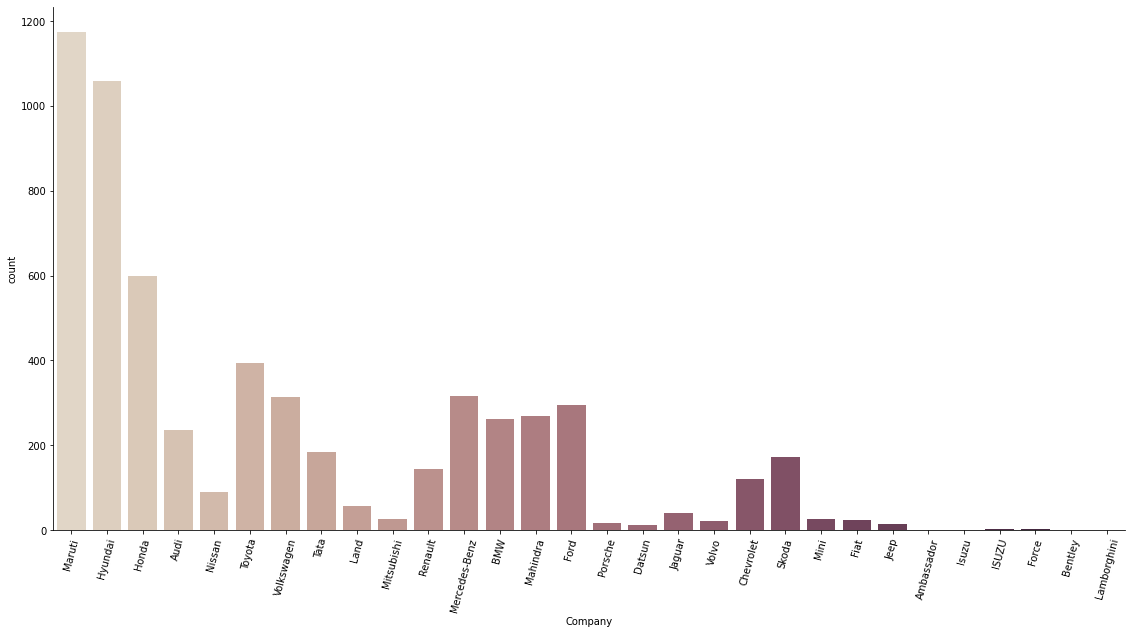

In [42]:
var = "Company"

plt.figure(figsize=(20, 10))
sns.catplot(x = var, kind = "count", palette = "ch:.25", height=8, aspect=2, data=train);
plt.xticks(rotation = 75);

#### From this graph we can clearly understand that Maruti is the Highest Manufacturer followed by Hyundai

## Location vs. Price

In [43]:
var = 'Location'
train[var].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

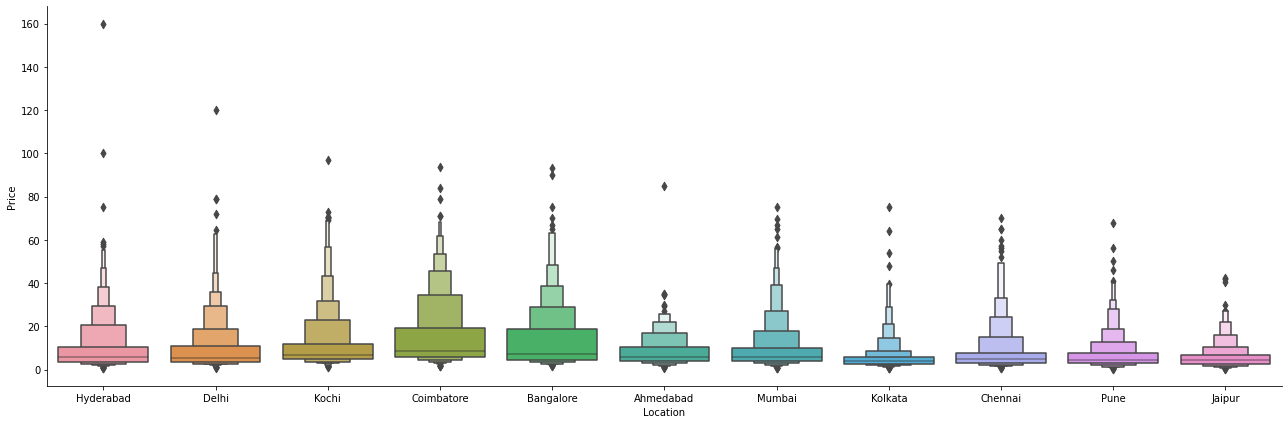

In [44]:
# Plot Location vs Price
sns.catplot(y='Price', x=var, data=train.sort_values('Price', ascending=False), kind="boxen", height=6, aspect=3)
plt.show

### Using One-Hot Encoding

If you notice we are dropping one column from the pre-processing <br>

We do this to avoid the <b> Dummy Variable Trap </b>

In [45]:
Location = train[[var]]
Location = pd.get_dummies(Location, drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


## Fuel Type vs. Price

In [46]:
var = 'Fuel_Type'
train[var].value_counts()

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

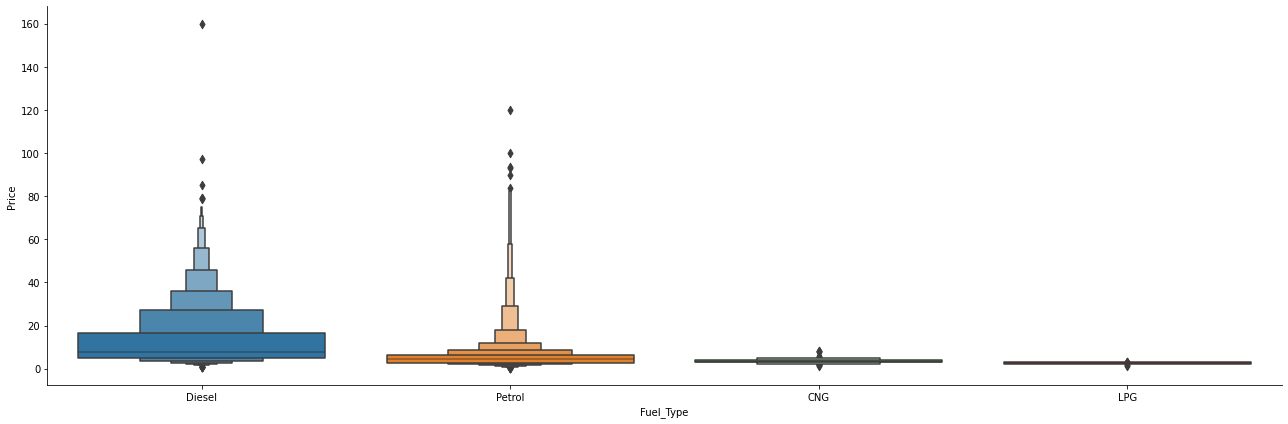

In [47]:
# Plot Fuel_Type vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price', x=var, data=train.sort_values('Price', ascending=False), kind="boxen", height=6, aspect=3)
plt.show

### Using One-Hot Encoding

If you notice we are dropping one column from the pre-processing <br>

We do this to avoid the <b> Dummy Variable Trap </b>

In [48]:
Fuel_t = train[[var]]
Fuel_t = pd.get_dummies(Fuel_t, drop_first=True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


## Transmission vs. Price

In [49]:
var = 'Transmission'
train[var].value_counts()

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

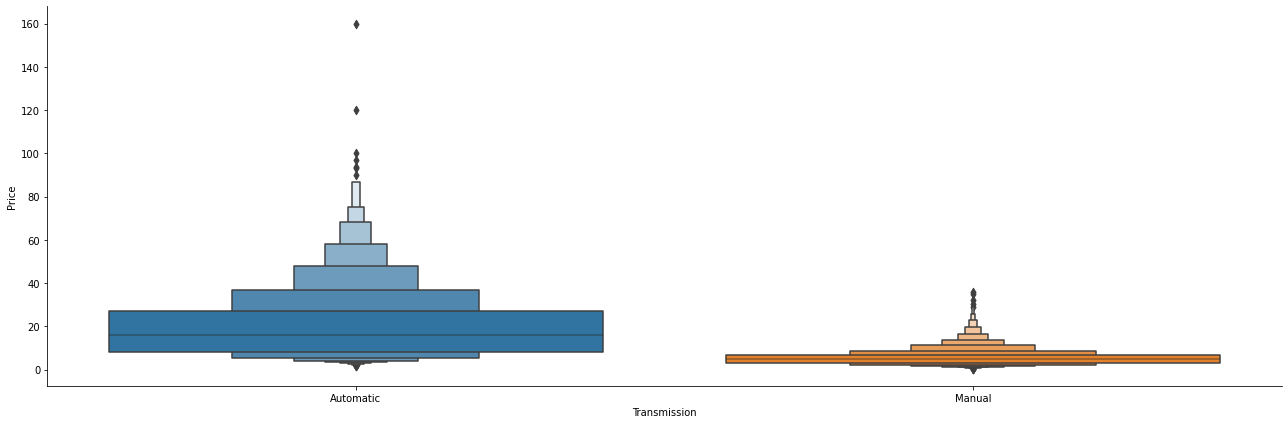

In [50]:
# Plot Transmission vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price', x=var, data=train.sort_values('Price', ascending=False), kind="boxen", height=6, aspect=3)
plt.show

### Using One-Hot Encoding

If you notice we are dropping one column from the pre-processing <br>

We do this to avoid the <b> Dummy Variable Trap </b>

In [51]:
Transmission = train[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


## Owner Type

In [52]:
var = 'Owner_Type'
train[var].value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

### Label Encoding

Coz here we need the Ranks where <b> First >  Second > Thrid > Fourth & Above </b>

In [53]:
train.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine (CC),Power (bhp),Seats,New_Price,Price,Company,Mileage(km/kg)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.6 km/kg,998.0,58.16,5.0,NaN,1.75,Maruti,26.60
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67 kmpl,1582.0,126.20,5.0,NaN,12.50,Hyundai,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.2 kmpl,1199.0,88.70,5.0,8.61,4.50,Honda,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77 kmpl,1248.0,88.76,7.0,NaN,6.00,Maruti,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.2 kmpl,1968.0,140.80,5.0,NaN,17.74,Audi,15.20


### Company vs. Price

In [54]:
var = 'Company'
train[var].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Company, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

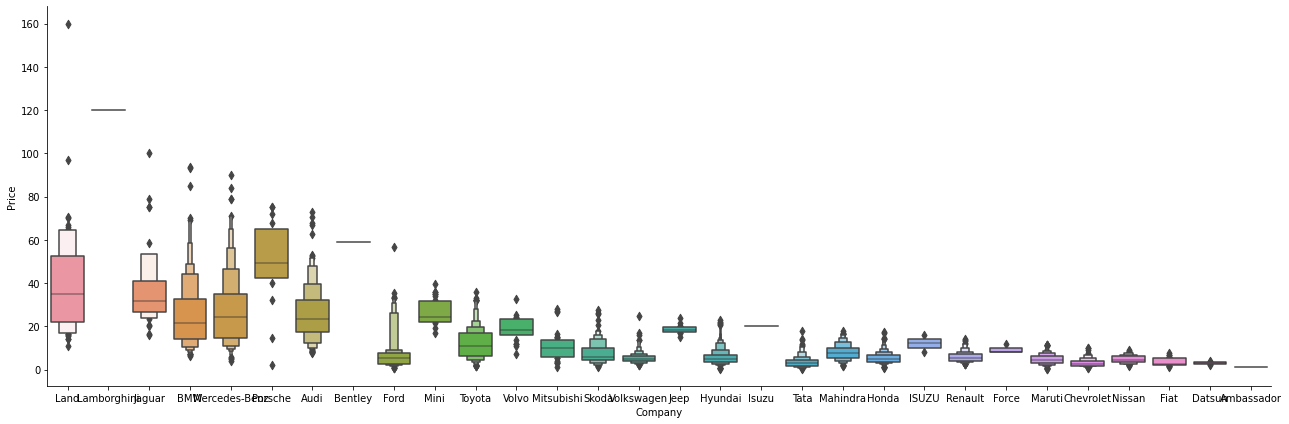

In [55]:
# Plot Company vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price', x=var, data=train.sort_values('Price', ascending=False), kind="boxen", height=6, aspect=3)
plt.show

### Too much Vairation and Unimportant Feature so let's drop it!

In [56]:
train.drop(["Company"],axis=1,inplace=True)

***

### Creating the Final Training Set with all the Important and Pre-Processed Features

In [57]:
final_train= pd.concat([train,Location,Fuel_t,Transmission],axis=1)
final_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine (CC),Power (bhp),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.6 km/kg,998.0,58.16,...,0,0,0,0,1,0,0,0,0,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67 kmpl,1582.0,126.20,...,0,0,0,0,0,1,1,0,0,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.2 kmpl,1199.0,88.70,...,0,0,0,0,0,0,0,0,1,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77 kmpl,1248.0,88.76,...,0,0,0,0,0,0,1,0,0,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.2 kmpl,1968.0,140.80,...,0,0,0,0,0,0,1,0,0,0


In [58]:
final_train.drop(["Location", "Fuel_Type", "Transmission", "New_Price"], axis=1, inplace=True)
final_train.head()

,Name,Year,Kilometers_Driven,Owner_Type,Mileage,Engine (CC),Power (bhp),Seats,Price,Mileage(km/kg),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Maruti Wagon R LXI CNG,2010,72000,1,26.6 km/kg,998.0,58.16,5.0,1.75,26.60,...,0,0,0,0,1,0,0,0,0,1
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,1,19.67 kmpl,1582.0,126.20,5.0,12.50,19.67,...,0,0,0,0,0,1,1,0,0,1
2,Honda Jazz V,2011,46000,1,18.2 kmpl,1199.0,88.70,5.0,4.50,18.20,...,0,0,0,0,0,0,0,0,1,1
3,Maruti Ertiga VDI,2012,87000,1,20.77 kmpl,1248.0,88.76,7.0,6.00,20.77,...,0,0,0,0,0,0,1,0,0,1
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,2,15.2 kmpl,1968.0,140.80,5.0,17.74,15.20,...,0,0,0,0,0,0,1,0,0,0


In [59]:
final_train.shape

(5872, 24)

## Now the Training Dataset is ready

## Let's go to the Test Set

In [60]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [61]:
#test = test.iloc[:,1:]
#test = test

print("Shape of test data Before dropping any Row: ", train.shape)

test = test[test['Mileage'].notna()]
print("Shape of test data After dropping Rows with NULL values in Mileage: ",test.shape)

test = test[test['Engine'].notna()]
print("Shape of test data After dropping Rows with NULL values in Engine : ",test.shape)

test = test[test['Power'].notna()]
print("Shape of test data After dropping Rows with NULL values in Power  : ",test.shape)

test = test[test['Seats'].notna()]
print("Shape of test data After dropping Rows with NULL values in Seats  : ",test.shape)

print('Droping null done')



test = test.reset_index(drop=True)
print('Index reset done')

for i in range(test.shape[0]):
    test.at[i, 'Mileage(km/kg)'] = test['Mileage'][i].split()[0]
    test.at[i, 'Engine(CC)'] = test['Engine'][i].split()[0]
    test.at[i, 'Power(bhp)'] = test['Power'][i].split()[0]
print('Split Done') 

test['Mileage(km/kg)'] = test['Mileage(km/kg)'].astype(float)
test['Engine(CC)'] = test['Engine(CC)'].astype(float)
print('casting 1 Done') 

position = []
for i in range(test.shape[0]):
    if test['Power(bhp)'][i]=='null':
        position.append(i)
        
test = test.drop(test.index[position])
test = test.reset_index(drop=True) 

test['Power(bhp)'] = test['Power(bhp)'].astype(float)
print('casting 2 Done') 

for i in range(test.shape[0]):
    if pd.isnull(test.loc[i,'New_Price']) == False:
        test.at[i,'New_car_Price'] = test['New_Price'][i].split()[0]

test['New_car_Price'] = test['New_car_Price'].astype(float)

test.drop(["Name"], axis=1, inplace=True)
test.drop(["Mileage"], axis=1, inplace=True)
test.drop(["Engine"], axis=1, inplace=True)
test.drop(["Power"], axis=1, inplace=True)
test.drop(["New_Price"], axis=1, inplace=True)

var = 'Location'
Location = test[[var]]
Location = pd.get_dummies(Location, drop_first=True)
Location.head()

var = 'Fuel_Type'
Fuel_t = test[[var]]
Fuel_t = pd.get_dummies(Fuel_t, drop_first=True)
Fuel_t.head()

var = 'Transmission'
Transmission = test[[var]]
Transmission = pd.get_dummies(Transmission, drop_first=True)
Transmission.head()

test.replace({"First":1, "Second":2, "Third": 3, "Fourth & Above":4}, inplace=True)
test.head()

final_test= pd.concat([test, Location, Fuel_t, Transmission],axis=1)
final_test.head()

final_test.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_test.head()

print("Final Test Size: ",final_test.shape)

Shape of test data Before dropping any Row:  (5872, 14)
Shape of test data After dropping Rows with NULL values in Mileage:  (1234, 12)
Shape of test data After dropping Rows with NULL values in Engine :  (1224, 12)
Shape of test data After dropping Rows with NULL values in Power  :  (1224, 12)
Shape of test data After dropping Rows with NULL values in Seats  :  (1223, 12)
Droping null done
Index reset done
Split Done
casting 1 Done
casting 2 Done
Final Test Size:  (1201, 21)


In [62]:
final_test.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2014,40929,1,4.0,32.26,998.0,58.20,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2013,54493,2,5.0,24.70,796.0,47.30,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,2017,34000,1,7.0,13.68,2393.0,147.80,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,2014,29000,1,5.0,18.50,1197.0,82.85,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,2016,85609,2,7.0,16.00,2179.0,140.00,0,0,1,...,0,0,0,0,0,0,1,0,0,1


## Feature Selection

In [63]:
final_train.columns

Index(['Name', 'Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage',
       'Engine (CC)', 'Power (bhp)', 'Seats', 'Price', 'Mileage(km/kg)',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')

In [64]:
X = final_train.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Mileage(km/kg)', 'Engine (CC)', 'Power (bhp)', 
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']]
X.shape

(5872, 21)

In [65]:
y = final_train.loc[:,['Price']]
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


### Heatmap Visualization

### Training Set Correlation (Without Feature Selection)

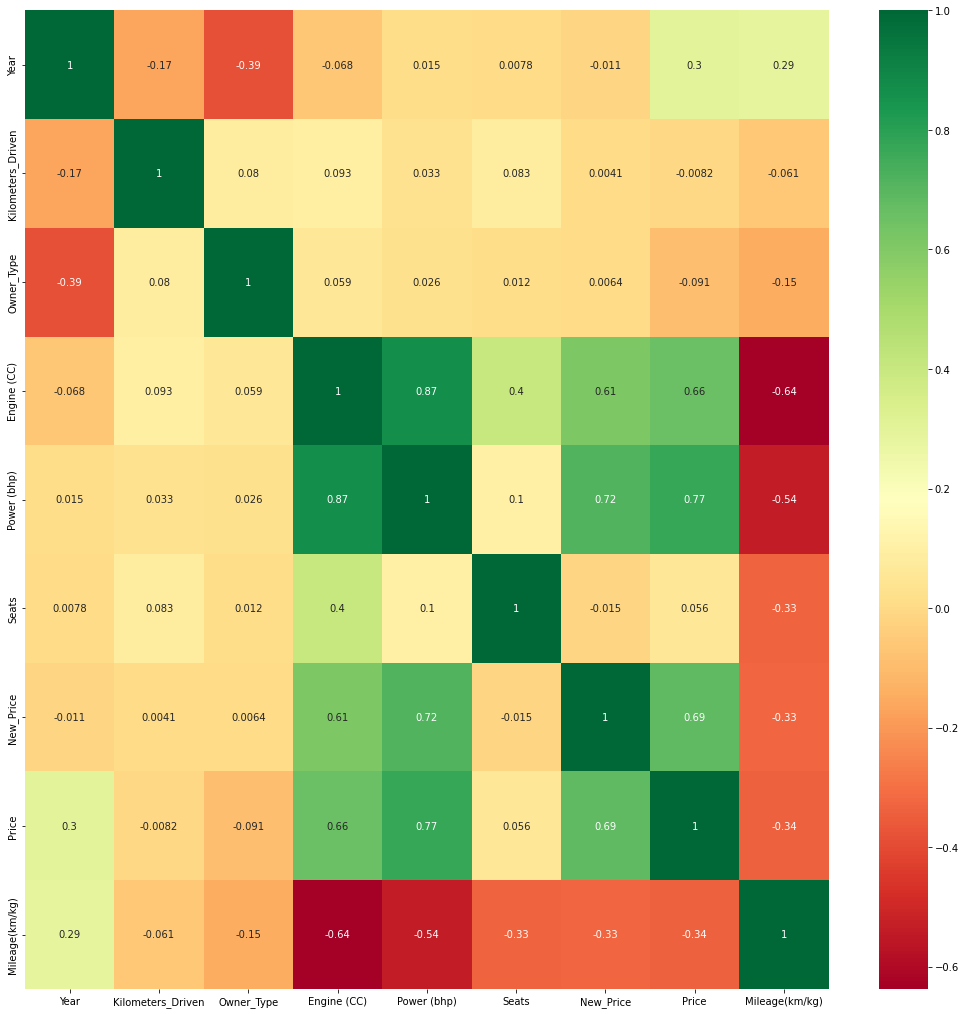

In [66]:
plt.figure(figsize=(18,18))
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn')

plt.show()

### Training Set Correlation (With all the Features)

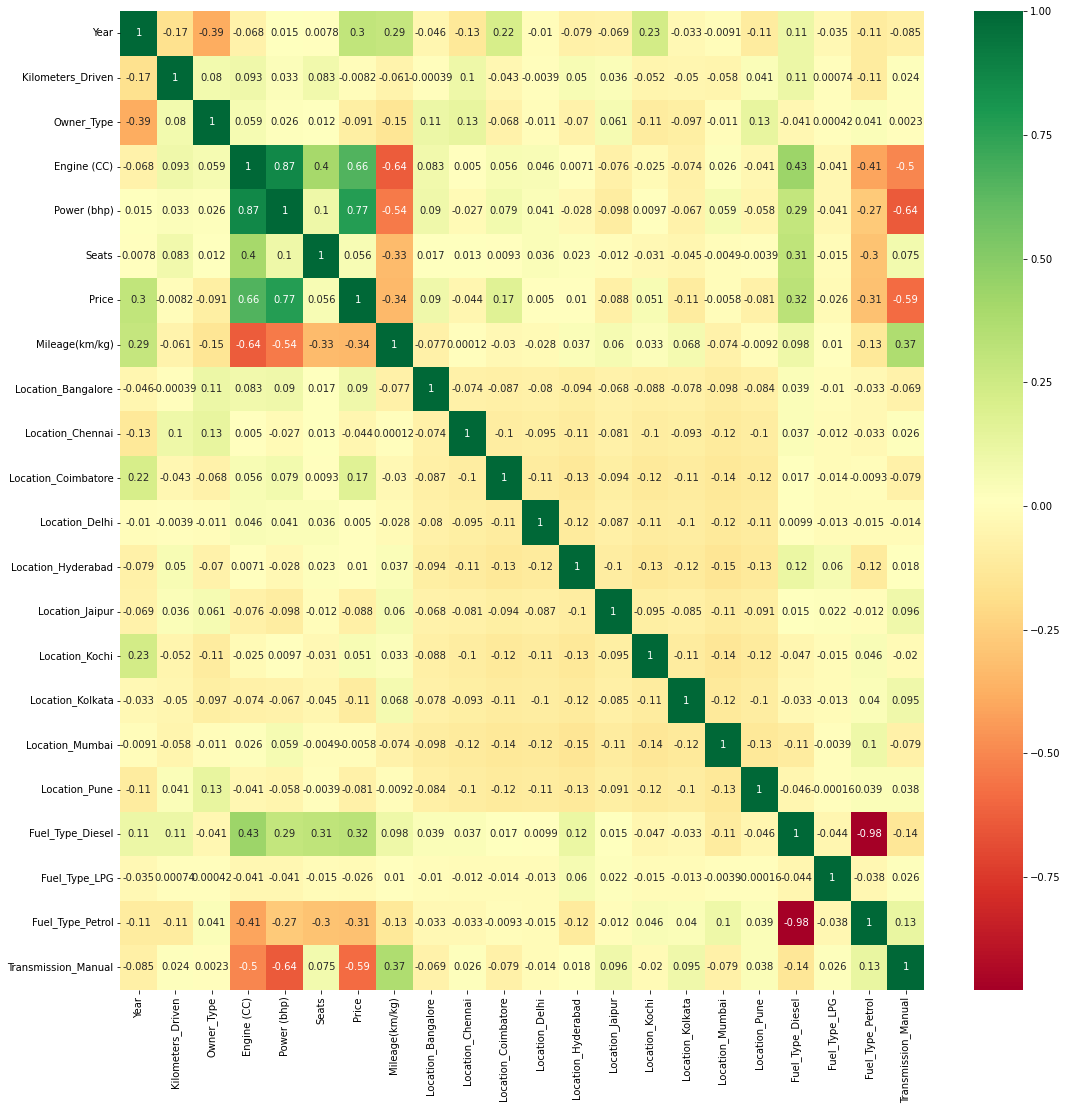

In [67]:
plt.figure(figsize=(18,18))
sns.heatmap(final_train.corr(),annot=True,cmap='RdYlGn')

plt.show()

## Importing the Extra Tree Regressor

In [68]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

C:\Users\Public\Documents\iSkysoft\CreatorTemp/ipykernel_19596/1302846868.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X,y)


ExtraTreesRegressor()

## Plotting the Importance of each and every Feature

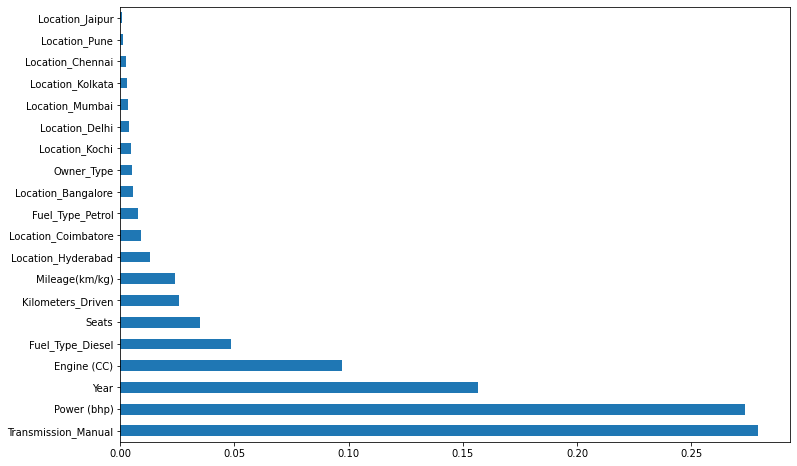

In [69]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Performing HOLDOUT

## Spliting the Set into Training and Testing

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

## Using Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

print("Accuracy on Traing set: ", linear_reg.score(X_train, y_train))
print("Accuracy on Testing set: ", linear_reg.score(X_test, y_test))

Accuracy on Traing set:  0.7083070284244655
Accuracy on Testing set:  0.6991016530827017


## The Linear Regressor performed poorly so we'll use another Algorithm!

## Using the Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [73]:
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)

C:\Users\Public\Documents\iSkysoft\CreatorTemp/ipykernel_19596/2041433112.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


In [74]:
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

Accuracy on Traing set:  0.9848268381452308
Accuracy on Testing set:  0.9120856902377436


## Using the Accuracy Metrics for Model Evaluation!

In [75]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table\n")
print('Mean Absolute Error (MAE)       : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error (MSE)       : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error (RMSE) : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error (RSqE)          : ', metrics.r2_score(y_test, y_pred))

		Error Table

Mean Absolute Error (MAE)       :  1.4993446474164136
Mean Squared  Error (MSE)       :  10.302714854668556
Root Mean Squared  Error (RMSE) :  3.209784238024194
R Squared Error (RSqE)          :  0.9120856902377436
